In [29]:
import pandas as pd
df = pd.read_csv("stocks.csv")  
df.head(250)  

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


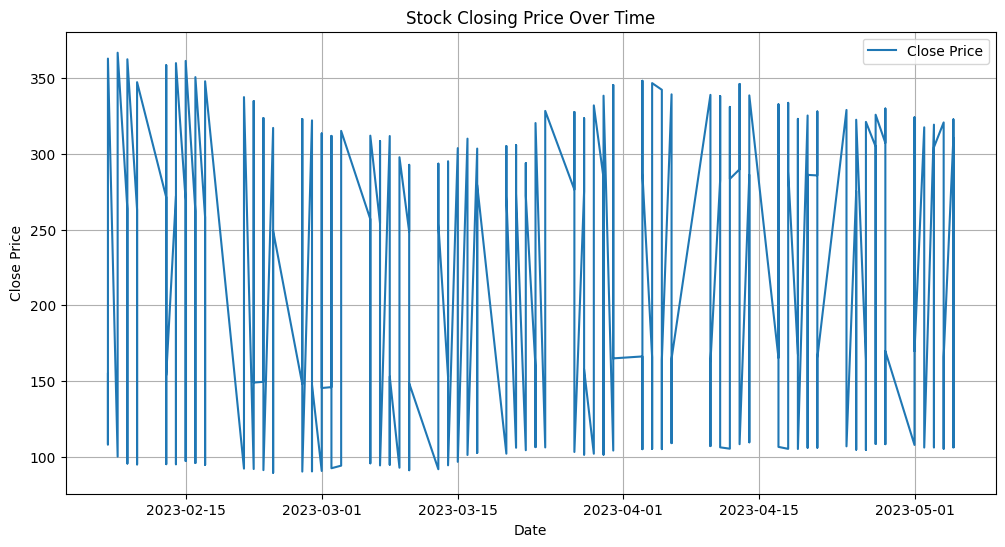

In [2]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()


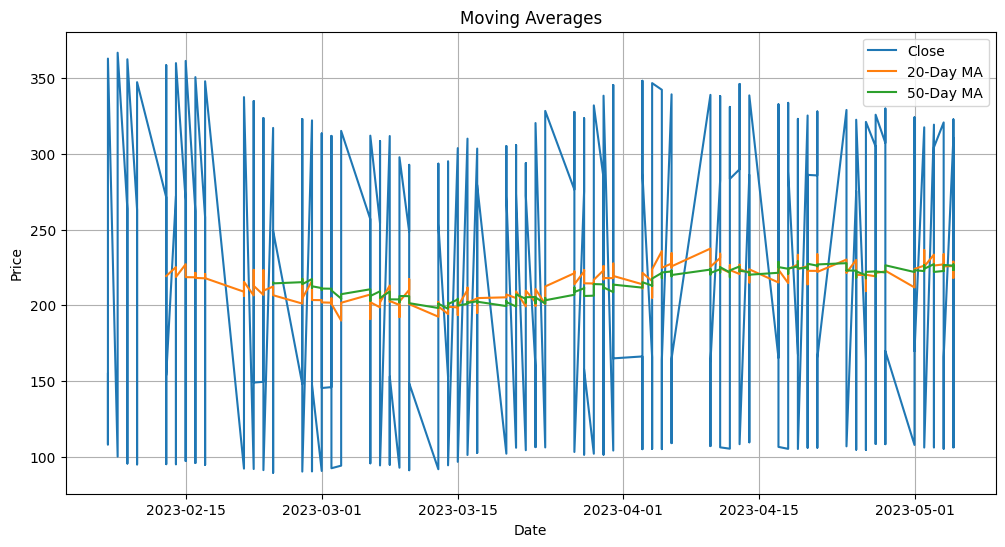

In [3]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA20'], label='20-Day MA')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
df['Daily Return (%)'] = df['Close'].pct_change() * 100
print(df[['Date', 'Close', 'Daily Return (%)']].head())


          Date       Close  Daily Return (%)
0   2023-02-07  154.649994               NaN
62  2023-02-07  267.559998         73.010028
186 2023-02-07  108.040001        -59.620271
124 2023-02-07  362.950012        235.940401
187 2023-02-08  100.000000        -72.447997


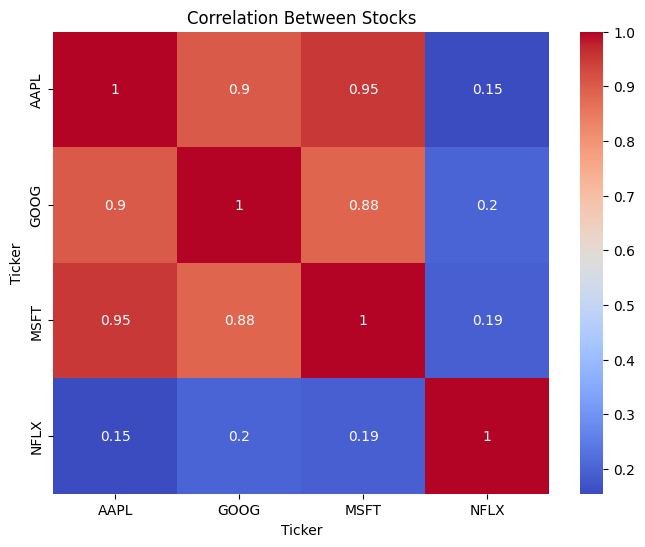

In [7]:
pivot_df = df.pivot(index='Date', columns='Ticker', values='Close')
correlation = pivot_df.corr()

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stocks')
plt.show()


In [8]:
volatility = df['Daily Return (%)'].std()
print(f"Volatility (Std Dev of Daily Return): {volatility:.2f}%")


Volatility (Std Dev of Daily Return): 95.84%


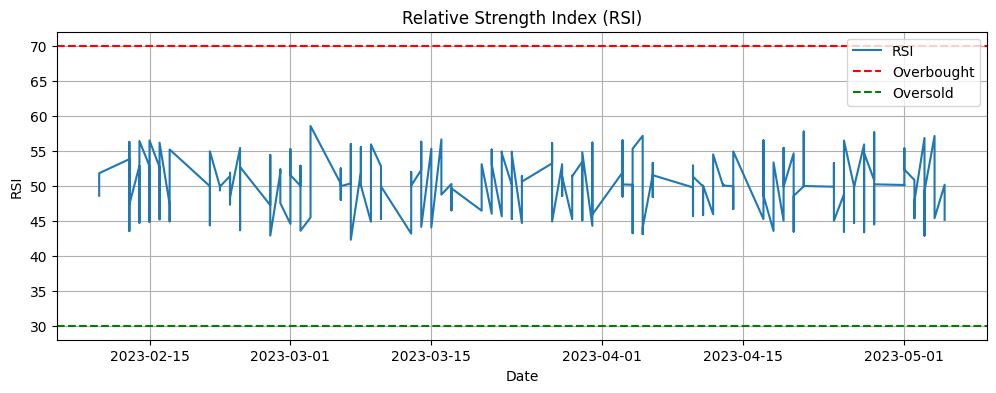

In [9]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

df['RSI'] = rsi

plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


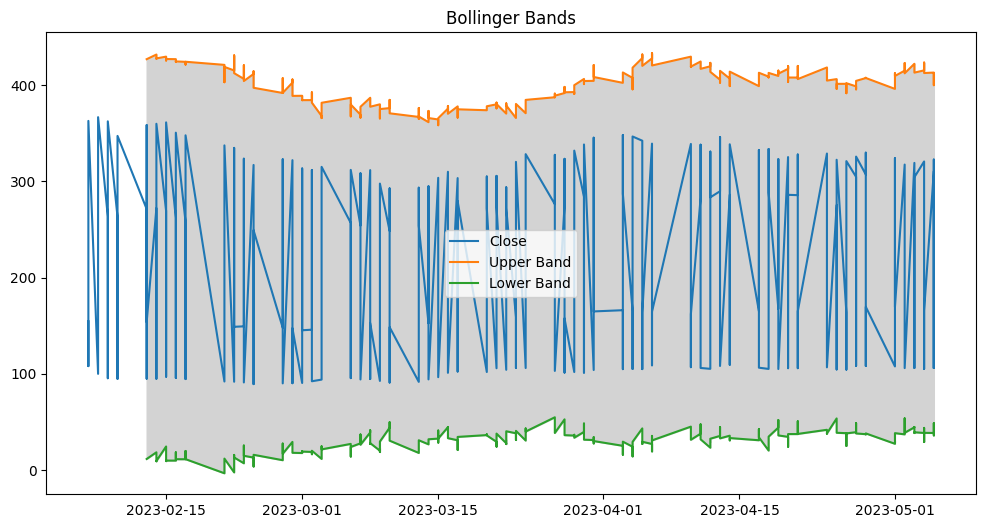

In [10]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['STD20'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['MA20'] + (df['STD20'] * 2)
df['Lower Band'] = df['MA20'] - (df['STD20'] * 2)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Upper Band'], label='Upper Band')
plt.plot(df['Date'], df['Lower Band'], label='Lower Band')
plt.fill_between(df['Date'], df['Lower Band'], df['Upper Band'], color='lightgray')
plt.title('Bollinger Bands')
plt.legend()
plt.show()


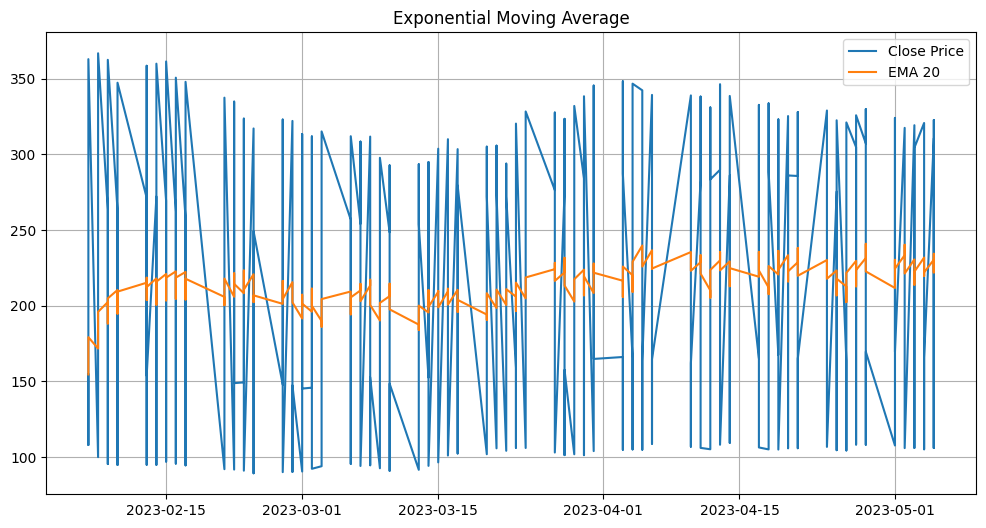

In [11]:
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['EMA20'], label='EMA 20')
plt.title('Exponential Moving Average')
plt.legend()
plt.grid(True)
plt.show()


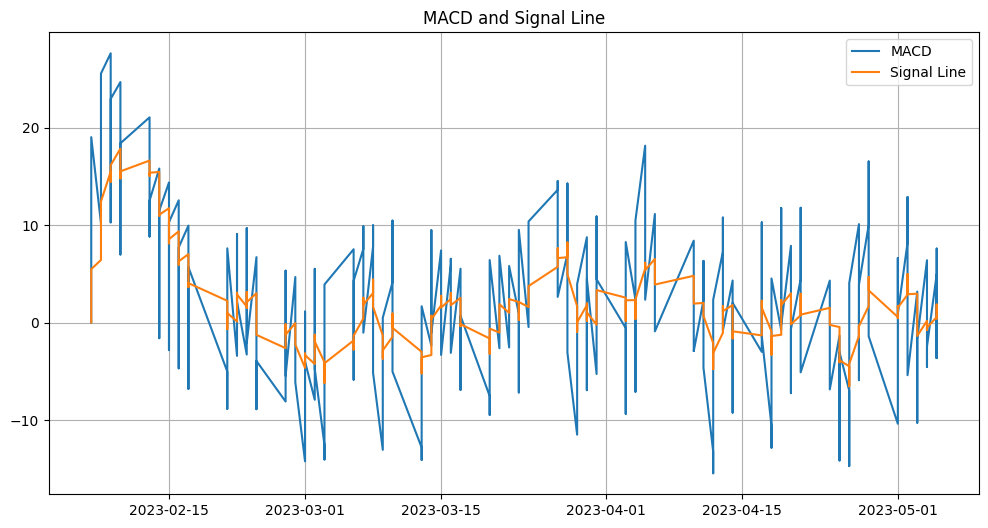

In [12]:
EMA12 = df['Close'].ewm(span=12, adjust=False).mean()
EMA26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = EMA12 - EMA26
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['Signal Line'], label='Signal Line')
plt.title('MACD and Signal Line')
plt.legend()
plt.grid(True)
plt.show()


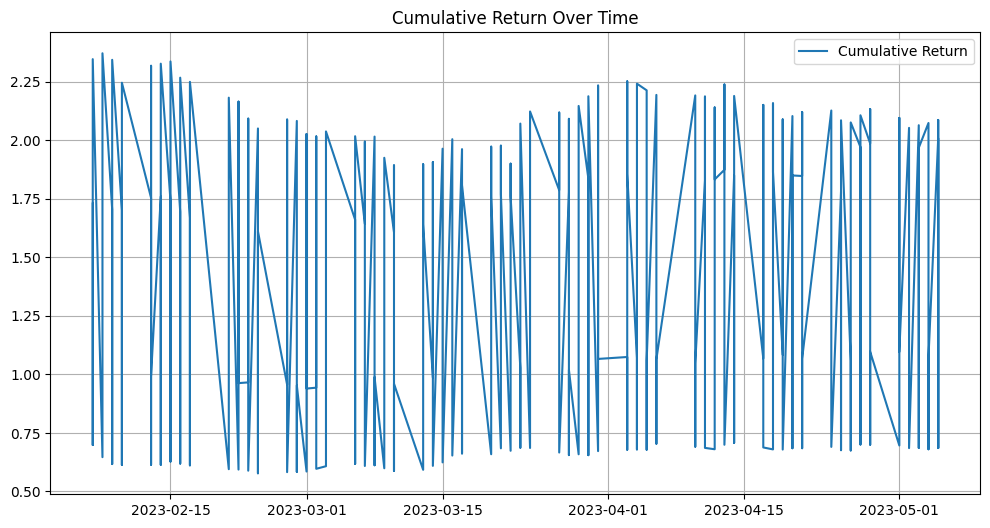

In [13]:
df['Cumulative Return'] = (1 + df['Close'].pct_change()).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.grid(True)
plt.legend()
plt.show()


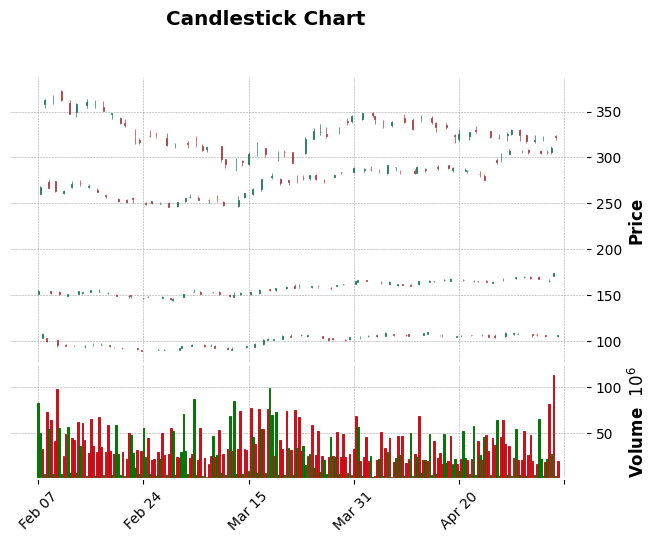

In [16]:
import mplfinance as mpf

df_candle = df.copy()
df_candle.set_index('Date', inplace=True)
df_candle.index = pd.to_datetime(df_candle.index)
mpf.plot(df_candle, type='candle', style='charles', volume=True, title='Candlestick Chart')


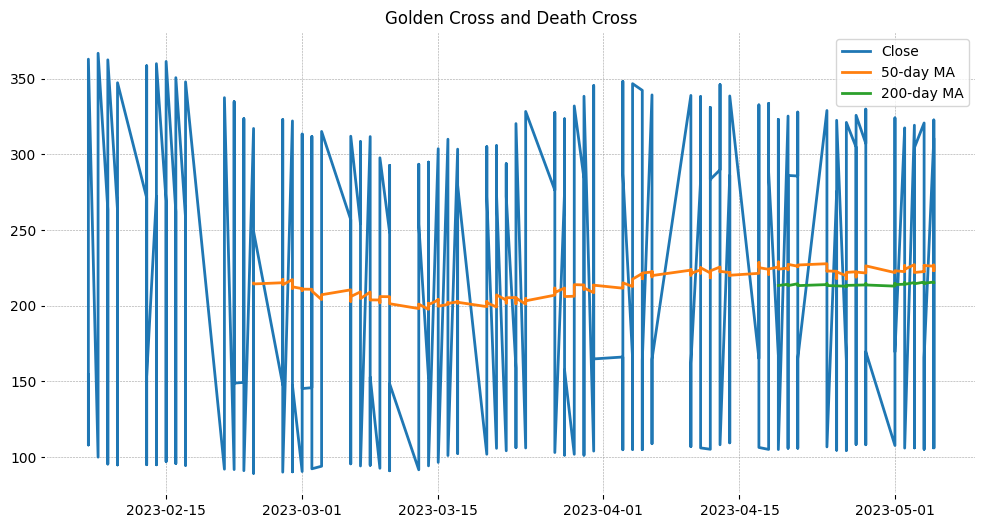

In [17]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA50'], label='50-day MA')
plt.plot(df['Date'], df['MA200'], label='200-day MA')
plt.title('Golden Cross and Death Cross')
plt.legend()
plt.grid(True)
plt.show()


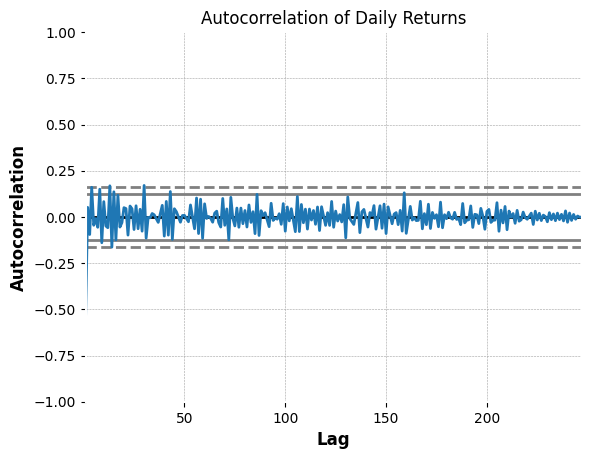

In [18]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Daily Return (%)'].dropna())
plt.title('Autocorrelation of Daily Returns')
plt.grid(True)
plt.show()


In [19]:
risk_free_rate = 0.01 / 252  # Assume 1% annual risk-free rate
daily_return = df['Close'].pct_change()
excess_return = daily_return - risk_free_rate
sharpe_ratio = (excess_return.mean() / excess_return.std()) * (252 ** 0.5)
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')


Sharpe Ratio: 5.20


In [20]:
import numpy as np

mean = df['Daily Return (%)'].mean()
std = df['Daily Return (%)'].std()
df['Outlier'] = np.where(np.abs(df['Daily Return (%)'] - mean) > 2 * std, 'Yes', 'No')

print(df[df['Outlier'] == 'Yes'][['Date', 'Daily Return (%)']])


          Date  Daily Return (%)
124 2023-02-07        235.940401
128 2023-02-13        277.442113
129 2023-02-14        279.104795
130 2023-02-15        272.214232
131 2023-02-16        266.162034
132 2023-02-17        267.861301
134 2023-02-22        264.793022
136 2023-02-24        248.248594
138 2023-02-28        257.524984
139 2023-03-01        246.348474
144 2023-03-08        231.092720
160 2023-03-30        234.020918
161 2023-03-31        232.192318
162 2023-04-03        231.979779


In [25]:
N = 5 
last_values = df['Close'].tail(N).values
forecast_steps = 10
forecast = []

for _ in range(forecast_steps):
    next_value = sum(last_values) / N
    forecast.append(next_value)
    last_values = list(last_values[1:]) + [next_value]  

print("Next 10-Day Forecast (SMA-based):")
for i, val in enumerate(forecast, 1):
    print(f"Day {i}: {val:.2f}")



Next 10-Day Forecast (SMA-based):
Day 1: 215.80
Day 2: 225.80
Day 3: 208.83
Day 4: 215.88
Day 5: 194.50
Day 6: 212.16
Day 7: 211.43
Day 8: 208.56
Day 9: 208.51
Day 10: 207.03


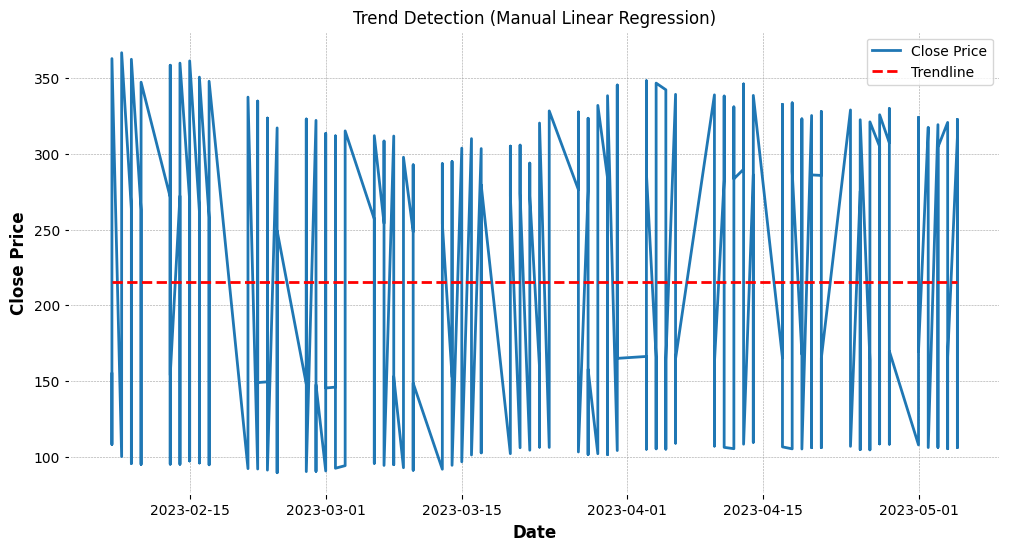

In [26]:
import numpy as np

df['Date_Num'] = pd.to_datetime(df['Date']).map(pd.Timestamp.toordinal)
x = df['Date_Num'].values
y = df['Close'].values

x_mean = np.mean(x)
y_mean = np.mean(y)
slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
intercept = y_mean - slope * x
df['Trend'] = slope * x + intercept

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Trend'], label='Trendline', linestyle='--', color='red')
plt.title('Trend Detection (Manual Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
